Machine Learning Task 1
Spam Email Detection using Tensorflow

Spam email detection is a crucial task in today's digital world, as it helps users filter out unwanted and potentially harmful messages. We will build a spam detection model using TensorFlow in Python. We will use the SMS Spam Collection Dataset from Kaggle, which contains labeled data to train and evaluate our model.


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Load the dataset
# Assuming a CSV file with columns 'text' (email subject) and 'label_num' (1 for spam, 0 for not spam)
df = pd.read_csv('/content/spam_ham_dataset.csv', encoding='latin-1')
print(df.head())

# Check for missing values
print(df.isnull().sum())

# Drop duplicates
df.drop_duplicates(inplace=True)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label_num'], test_size=0.2, random_state=42, stratify=df['label_num'])

# Vectorize text using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train).toarray()
X_test_tfidf = vectorizer.transform(X_test).toarray()


Unnamed: 0    0
label         0
text          0
label_num     0
dtype: int64


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Define the model
model = Sequential([
    Dense(512, activation='relu', input_shape=(X_train_tfidf.shape[1],)),
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fit the model
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model.fit(X_train_tfidf, y_train, epochs=20, batch_size=32, validation_split=0.2, callbacks=[early_stopping])


Epoch 1/20
104/104 [==============================] - 8s 63ms/step - loss: 0.2486 - accuracy: 0.8764 - val_loss: 0.0565 - val_accuracy: 0.9783
Epoch 2/20
104/104 [==============================] - 6s 53ms/step - loss: 0.0250 - accuracy: 0.9918 - val_loss: 0.0428 - val_accuracy: 0.9843
Epoch 3/20
104/104 [==============================] - 6s 54ms/step - loss: 0.0051 - accuracy: 0.9994 - val_loss: 0.0552 - val_accuracy: 0.9855
Epoch 4/20
104/104 [==============================] - 6s 54ms/step - loss: 0.0035 - accuracy: 0.9997 - val_loss: 0.0455 - val_accuracy: 0.9879
Epoch 5/20
104/104 [==============================] - 4s 36ms/step - loss: 0.0026 - accuracy: 0.9997 - val_loss: 0.0457 - val_accuracy: 0.9867


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Predict on test data
y_pred_prob = model.predict(X_test_tfidf)
y_pred = (y_pred_prob > 0.5).astype("int32")

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')


33/33 [==============================] - 1s 16ms/step
Accuracy: 0.9826
Precision: 0.9896
Recall: 0.9500
F1 Score: 0.9694


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

Confusion Matrix:
[[732   3]
 [ 15 285]]


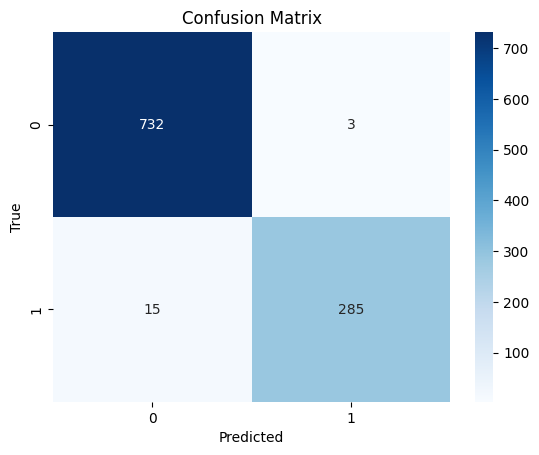

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# Plot confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       735
           1       0.99      0.95      0.97       300

    accuracy                           0.98      1035
   macro avg       0.98      0.97      0.98      1035
weighted avg       0.98      0.98      0.98      1035

